___
# Ciência dos Dados - PROJETO 1

## Alexandre Young Coelho da Costa
___

## A adoção de dispositivos de telecomunicações entre diferentes de renda

___
## Introdução

O objetivo deste estudo é pesquisar a difusão de celulares móveis nos domicílios brasileiros ao longos dos anos de 2013, 2014 e 2015.

Partimos da hipótese que haja um aumento da frequência de celulares nos domíclios ao longo dos anos, mas mais interessantemente, que esse aumento seja significativamente maior em domicílios de menor renda

___
## Análise e Resultados

In [364]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [365]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/alexandre/Documents/Insper/2017-2/CD/Meu Git/CD17/Projeto 1


## Primeira etapa: Separação de variáveis de Interesse

Queremos separar as variáveis que nos interessam e com que vamos trabalhar
Utilizando as PNADs dos aos de 2013, 2014 e 2015 no estudo, separando os dados relevantes à adoção de telefones móveis e à renda domiciliar

A nossa análise faz uso das variáveis do IBGE: ***"Tem telefone móvel celular"***, ***"Tem telefone fixo convencional"*** e ***"Rendimento mensal domiciliar para todas as unidades domiciliares (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico e das pessoas de menos de 10 anos de idade)"***

In [366]:
df13= pd.DataFrame()
df14= pd.DataFrame()
df15= pd.DataFrame()

tmp= pd.read_csv('DOM2013.csv',sep=',')
df13['Celular']= tmp.V0220
df13['Fixo']= tmp.V2020
df13['Renda']= tmp.V4621

tmp= pd.read_csv('DOM2014.csv',sep=',')
df14['Celular']= tmp.V0220
df14['Fixo']= tmp.V2020
df14['Renda']= tmp.V4621

tmp= pd.read_csv('DOM2015.csv',sep=',')
df15['Celular']= tmp.V0220
df15['Fixo']= tmp.V2020
df15['Renda']= tmp.V4621

tmp=None


In [367]:
#Filtrando o dataframe:

#1. Substituir osvalores 2.0 e 4.0 nas colunas "celular" e "fixo"--
#--com "Presente"  e "Ausente" respectivamente
df13['Celular']= df13['Celular'].map({2.0: "Presente", 4.0: "Ausente"})
df14['Celular']= df14['Celular'].map({2.0: "Presente", 4.0: "Ausente"})
df15['Celular']= df15['Celular'].map({2.0: "Presente", 4.0: "Ausente"})
df13['Fixo']= df13['Fixo'].map({2.0: "Presente", 4.0: "Ausente"})
df14['Fixo']= df14['Fixo'].map({2.0: "Presente", 4.0: "Ausente"})
df15['Fixo']= df15['Fixo'].map({2.0: "Presente", 4.0: "Ausente"})

#2. Remover as linhas na coluna "rendimento" com valor 999999999999 (sem declaração)
df13= df13[df13['Renda'] != 999999999999]
df14= df14[df14['Renda'] != 999999999999]
df15= df15[df15['Renda'] != 999999999999]

#3. Remover as linhas com qualquer valor NaN
df13= df13.dropna()
df14= df14.dropna()
df15= df15.dropna()


## Segunda etapa: análise preliminar dos dados apresentados

Dado que nossas variáveis preliminares foram coletadas, queremos agora analisar como se deu a variação de posse de telefones móveis celulares ao longo dos anos de 2013 a 2015. Separamos as diferentes margens de rendas seguindo as indicações de 2016 do IBGE quanto à renda familiar, de acordo com a seguinte rubrica:

E - até 1874 reais (até 2 salários mínimos)

D - 1874 a 3748 reais (entre 2 e 4 salários mínimos)

C - 3748 a 9370 reais (entre 4 e 10 salários mínimos)

B - 9370 a 18740 reais (entre 10 e 20 salários mínimos)

A - superior a 18740 reais (acima de 20 salários mínimos)

In [368]:
import warnings; warnings.simplefilter('ignore')

#primeiro lidando com PNAD2013...
df13['Renda'][(df13['Renda']<=1874.0)]= 10
df13['Renda'][(df13['Renda']>1874) & (df13['Renda']<=3748)]= 20
df13['Renda'][(df13['Renda']>3748) & (df13['Renda']<=9370)]= 30
df13['Renda'][(df13['Renda']>9370) & (df13['Renda']<=18740)]= 40
df13['Renda'][(df13['Renda']>18740)]= 50

df13['Renda']= df13['Renda'].map({10: "E", 20: "D", 30: "C", 40:"B", 50:"A"})

#...2014...
df14['Renda'][(df14['Renda']<=1874.0)]= 10
df14['Renda'][(df14['Renda']>1874) & (df14['Renda']<=3748)]= 20
df14['Renda'][(df14['Renda']>3748) & (df14['Renda']<=9370)]= 30
df14['Renda'][(df14['Renda']>9370) & (df14['Renda']<=18740)]= 40
df14['Renda'][(df14['Renda']>18740)]= 50

df14['Renda']= df14['Renda'].map({10: "E", 20: "D", 30: "C", 40:"B", 50:"A"})

#...e 2015
df15['Renda'][(df15['Renda']<=1874.0)]= 10
df15['Renda'][(df15['Renda']>1874) & (df15['Renda']<=3748)]= 20
df15['Renda'][(df15['Renda']>3748) & (df15['Renda']<=9370)]= 30
df15['Renda'][(df15['Renda']>9370) & (df15['Renda']<=18740)]= 40
df15['Renda'][(df15['Renda']>18740)]= 50

df15['Renda']= df15['Renda'].map({10: "E", 20: "D", 30: "C", 40:"B", 50:"A"})

#

Analisamos agora o porcentual de posse de telefone móvel para fixo em cada faixa econômica

In [369]:
analysis13= pd.DataFrame()
analysis13['Apenas Fixo']= [
    len( df13[(df13['Renda']=="E") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="D") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="C") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="B") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="A") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Presente")] )
    ]

analysis13['Apenas Móvel']= [
    len( df13[(df13['Renda']=="E") & (df13['Celular']=="Presente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="D") & (df13['Celular']=="Presente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="C") & (df13['Celular']=="Presente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="B") & (df13['Celular']=="Presente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="A") & (df13['Celular']=="Presente") & (df13['Fixo']=="Ausente")] )
    ]

analysis13['Fixo e Móvel']= [
    len( df13[(df13['Renda']=="E") & (df13['Celular']=="Presente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="D") & (df13['Celular']=="Presente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="C") & (df13['Celular']=="Presente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="B") & (df13['Celular']=="Presente") & (df13['Fixo']=="Presente")] ),
    len( df13[(df13['Renda']=="A") & (df13['Celular']=="Presente") & (df13['Fixo']=="Presente")] )
    ]

analysis13['Nenhum telefone']= [
    len( df13[(df13['Renda']=="E") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="D") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="C") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="B") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Ausente")] ),
    len( df13[(df13['Renda']=="A") & (df13['Celular']=="Ausente") & (df13['Fixo']=="Ausente")] )
    ]
    
analysis13.index=['E', 'D', 'C', 'B', 'A']
analysis13

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,2268,58961,26749,8312
D,207,3156,5851,93
C,88,957,3158,15
B,13,148,591,1
A,1,25,92,1


Repetimos o mesmo processo para os anos de 2014 e 2015:

In [370]:
analysis14= pd.DataFrame()
analysis14['Apenas Fixo']= [
    len( df14[(df14['Renda']=="E") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="D") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="C") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="B") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="A") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Presente")] )
    ]

analysis14['Apenas Móvel']= [
    len( df14[(df14['Renda']=="E") & (df14['Celular']=="Presente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="D") & (df14['Celular']=="Presente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="C") & (df14['Celular']=="Presente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="B") & (df14['Celular']=="Presente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="A") & (df14['Celular']=="Presente") & (df14['Fixo']=="Ausente")] )
    ]

analysis14['Fixo e Móvel']= [
    len( df14[(df14['Renda']=="E") & (df14['Celular']=="Presente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="D") & (df14['Celular']=="Presente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="C") & (df14['Celular']=="Presente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="B") & (df14['Celular']=="Presente") & (df14['Fixo']=="Presente")] ),
    len( df14[(df14['Renda']=="A") & (df14['Celular']=="Presente") & (df14['Fixo']=="Presente")] )
    ]

analysis14['Nenhum telefone']= [
    len( df14[(df14['Renda']=="E") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="D") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="C") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="B") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Ausente")] ),
    len( df14[(df14['Renda']=="A") & (df14['Celular']=="Ausente") & (df14['Fixo']=="Ausente")] )
    ]
    
analysis14.index=['E', 'D', 'C', 'B', 'A']
analysis14

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,1937,62804,25926,7246
D,247,4099,6344,118
C,83,1174,3693,23
B,14,197,689,3
A,4,37,130,0


In [371]:
analysis15= pd.DataFrame()
analysis15['Apenas Fixo']= [
    len( df15[(df15['Renda']=="E") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="D") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="C") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="B") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="A") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Presente")] )
    ]

analysis15['Apenas Móvel']= [
    len( df15[(df15['Renda']=="E") & (df15['Celular']=="Presente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="D") & (df15['Celular']=="Presente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="C") & (df15['Celular']=="Presente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="B") & (df15['Celular']=="Presente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="A") & (df15['Celular']=="Presente") & (df15['Fixo']=="Ausente")] )
    ]

analysis15['Fixo e Móvel']= [
    len( df15[(df15['Renda']=="E") & (df15['Celular']=="Presente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="D") & (df15['Celular']=="Presente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="C") & (df15['Celular']=="Presente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="B") & (df15['Celular']=="Presente") & (df15['Fixo']=="Presente")] ),
    len( df15[(df15['Renda']=="A") & (df15['Celular']=="Presente") & (df15['Fixo']=="Presente")] )
    ]

analysis15['Nenhum telefone']= [
    len( df15[(df15['Renda']=="E") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="D") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="C") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="B") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Ausente")] ),
    len( df15[(df15['Renda']=="A") & (df15['Celular']=="Ausente") & (df15['Fixo']=="Ausente")] )
    ]
    
analysis15.index=['E', 'D', 'C', 'B', 'A']
analysis15

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,1713,64374,24326,7441
D,214,4326,6555,105
C,72,1420,3595,19
B,15,208,716,0
A,3,48,146,0


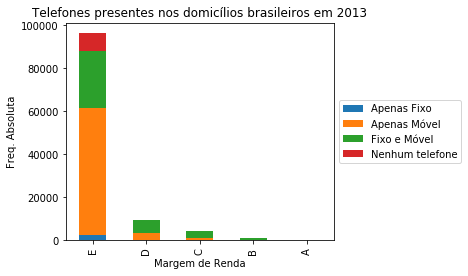

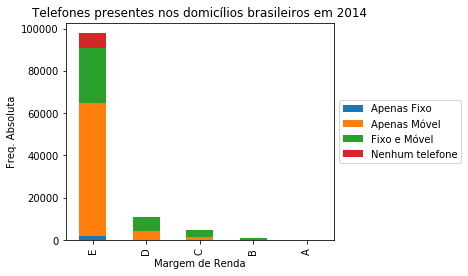

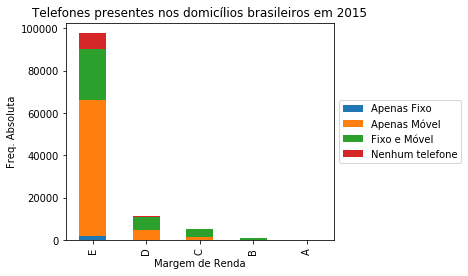

In [372]:
#2013
plot = analysis13.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2013')
plt.ylabel('Freq. Absoluta')
plt.xlabel('Margem de Renda')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#2014
plot = analysis14.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2014')
plt.ylabel('Freq. Absoluta')
plt.xlabel('Margem de Renda')

#etc etc
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#2015
plot = analysis15.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2015')
plt.ylabel('Freq. Absoluta')
plt.xlabel('Margem de Renda')

#etc etc
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Terceira etapa: análise elaborada

Ainda que seja possível tirar conclusões com os dados absolutados plotados anteriormente, é sensato normalizar as amostras de forma à comparar as frequências entre os diferentes telefones presentes em cada faixa de renda de forma à tirar conclusões mais bem embasadas:

In [373]:
#Primeiro trabalhamos referente aos dados de 2013
#--normalizamos em 'E'
total= analysis13['Apenas Fixo']['E'] + analysis13['Apenas Móvel']['E'] + analysis13['Fixo e Móvel']['E'] + analysis13['Nenhum telefone']['E']
total= float(total)
analysis13['Apenas Fixo']['E']= (analysis13['Apenas Fixo']['E']*100.0)/total
analysis13['Apenas Móvel']['E']= (analysis13['Apenas Móvel']['E']*100.0)/total
analysis13['Fixo e Móvel']['E']= (analysis13['Fixo e Móvel']['E']*100.0)/total
analysis13['Nenhum telefone']['E']= (analysis13['Nenhum telefone']['E']*100.0)/total

#--normalizamos em 'D'
total= analysis13['Apenas Fixo']['D'] + analysis13['Apenas Móvel']['D'] + analysis13['Fixo e Móvel']['D'] + analysis13['Nenhum telefone']['D']
total= float(total)
analysis13['Apenas Fixo']['D']= (analysis13['Apenas Fixo']['D']*100.0)/total
analysis13['Apenas Móvel']['D']= (analysis13['Apenas Móvel']['D']*100.0)/total
analysis13['Fixo e Móvel']['D']= (analysis13['Fixo e Móvel']['D']*100.0)/total
analysis13['Nenhum telefone']['D']= (analysis13['Nenhum telefone']['D']*100.0)/total

#--normalizamos em 'C'
total= analysis13['Apenas Fixo']['C'] + analysis13['Apenas Móvel']['C'] + analysis13['Fixo e Móvel']['C'] + analysis13['Nenhum telefone']['C']
total= float(total)
analysis13['Apenas Fixo']['C']= (analysis13['Apenas Fixo']['C']*100.0)/total
analysis13['Apenas Móvel']['C']= (analysis13['Apenas Móvel']['C']*100.0)/total
analysis13['Fixo e Móvel']['C']= (analysis13['Fixo e Móvel']['C']*100.0)/total
analysis13['Nenhum telefone']['C']= (analysis13['Nenhum telefone']['C']*100.0)/total

#--normalizamos em 'B'
total= analysis13['Apenas Fixo']['B'] + analysis13['Apenas Móvel']['B'] + analysis13['Fixo e Móvel']['B'] + analysis13['Nenhum telefone']['B']
total= float(total)
analysis13['Apenas Fixo']['B']= (analysis13['Apenas Fixo']['B']*100.0)/total
analysis13['Apenas Móvel']['B']= (analysis13['Apenas Móvel']['B']*100.0)/total
analysis13['Fixo e Móvel']['B']= (analysis13['Fixo e Móvel']['B']*100.0)/total
analysis13['Nenhum telefone']['B']= (analysis13['Nenhum telefone']['B']*100.0)/total

#--normalizamos em 'A'
total= analysis13['Apenas Fixo']['A'] + analysis13['Apenas Móvel']['A'] + analysis13['Fixo e Móvel']['A'] + analysis13['Nenhum telefone']['A']
total= float(total)
analysis13['Apenas Fixo']['A']= (analysis13['Apenas Fixo']['A']*100.0)/total
analysis13['Apenas Móvel']['A']= (analysis13['Apenas Móvel']['A']*100.0)/total
analysis13['Fixo e Móvel']['A']= (analysis13['Fixo e Móvel']['A']*100.0)/total
analysis13['Nenhum telefone']['A']= (analysis13['Nenhum telefone']['A']*100.0)/total

analysis13

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,2,61,27,8
D,2,33,62,0
C,2,22,74,0
B,1,19,78,0
A,0,21,77,0


In [374]:
#Agora trabalhamos referente aos dados de 2014
#--normalizamos em 'E'
total= analysis14['Apenas Fixo']['E'] + analysis14['Apenas Móvel']['E'] + analysis14['Fixo e Móvel']['E'] + analysis14['Nenhum telefone']['E']
total= float(total)
analysis14['Apenas Fixo']['E']= (analysis14['Apenas Fixo']['E']*100.0)/total
analysis14['Apenas Móvel']['E']= (analysis14['Apenas Móvel']['E']*100.0)/total
analysis14['Fixo e Móvel']['E']= (analysis14['Fixo e Móvel']['E']*100.0)/total
analysis14['Nenhum telefone']['E']= (analysis14['Nenhum telefone']['E']*100.0)/total

#--normalizamos em 'D'
total= analysis14['Apenas Fixo']['D'] + analysis14['Apenas Móvel']['D'] + analysis14['Fixo e Móvel']['D'] + analysis14['Nenhum telefone']['D']
total= float(total)
analysis14['Apenas Fixo']['D']= (analysis14['Apenas Fixo']['D']*100.0)/total
analysis14['Apenas Móvel']['D']= (analysis14['Apenas Móvel']['D']*100.0)/total
analysis14['Fixo e Móvel']['D']= (analysis14['Fixo e Móvel']['D']*100.0)/total
analysis14['Nenhum telefone']['D']= (analysis14['Nenhum telefone']['D']*100.0)/total

#--normalizamos em 'C'
total= analysis14['Apenas Fixo']['C'] + analysis14['Apenas Móvel']['C'] + analysis14['Fixo e Móvel']['C'] + analysis14['Nenhum telefone']['C']
total= float(total)
analysis14['Apenas Fixo']['C']= (analysis14['Apenas Fixo']['C']*100.0)/total
analysis14['Apenas Móvel']['C']= (analysis14['Apenas Móvel']['C']*100.0)/total
analysis14['Fixo e Móvel']['C']= (analysis14['Fixo e Móvel']['C']*100.0)/total
analysis14['Nenhum telefone']['C']= (analysis14['Nenhum telefone']['C']*100.0)/total

#--normalizamos em 'B'
total= analysis14['Apenas Fixo']['B'] + analysis14['Apenas Móvel']['B'] + analysis14['Fixo e Móvel']['B'] + analysis14['Nenhum telefone']['B']
total= float(total)
analysis14['Apenas Fixo']['B']= (analysis14['Apenas Fixo']['B']*100.0)/total
analysis14['Apenas Móvel']['B']= (analysis14['Apenas Móvel']['B']*100.0)/total
analysis14['Fixo e Móvel']['B']= (analysis14['Fixo e Móvel']['B']*100.0)/total
analysis14['Nenhum telefone']['B']= (analysis14['Nenhum telefone']['B']*100.0)/total

#--normalizamos em 'A'
total= analysis14['Apenas Fixo']['A'] + analysis14['Apenas Móvel']['A'] + analysis14['Fixo e Móvel']['A'] + analysis14['Nenhum telefone']['A']
total= float(total)
analysis14['Apenas Fixo']['A']= (analysis14['Apenas Fixo']['A']*100.0)/total
analysis14['Apenas Móvel']['A']= (analysis14['Apenas Móvel']['A']*100.0)/total
analysis14['Fixo e Móvel']['A']= (analysis14['Fixo e Móvel']['A']*100.0)/total
analysis14['Nenhum telefone']['A']= (analysis14['Nenhum telefone']['A']*100.0)/total

analysis14

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,1,64,26,7
D,2,37,58,1
C,1,23,74,0
B,1,21,76,0
A,2,21,76,0


In [375]:
#Por fim trabalhamos referente aos dados de 2015
#--normalizamos em 'E'
total= analysis15['Apenas Fixo']['E'] + analysis15['Apenas Móvel']['E'] + analysis15['Fixo e Móvel']['E'] + analysis15['Nenhum telefone']['E']
total= float(total)
analysis15['Apenas Fixo']['E']= (analysis15['Apenas Fixo']['E']*100.0)/total
analysis15['Apenas Móvel']['E']= (analysis15['Apenas Móvel']['E']*100.0)/total
analysis15['Fixo e Móvel']['E']= (analysis15['Fixo e Móvel']['E']*100.0)/total
analysis15['Nenhum telefone']['E']= (analysis15['Nenhum telefone']['E']*100.0)/total

#--normalizamos em 'D'
total= analysis15['Apenas Fixo']['D'] + analysis15['Apenas Móvel']['D'] + analysis15['Fixo e Móvel']['D'] + analysis15['Nenhum telefone']['D']
total= float(total)
analysis15['Apenas Fixo']['D']= (analysis15['Apenas Fixo']['D']*100.0)/total
analysis15['Apenas Móvel']['D']= (analysis15['Apenas Móvel']['D']*100.0)/total
analysis15['Fixo e Móvel']['D']= (analysis15['Fixo e Móvel']['D']*100.0)/total
analysis15['Nenhum telefone']['D']= (analysis15['Nenhum telefone']['D']*100.0)/total

#--normalizamos em 'C'
total= analysis15['Apenas Fixo']['C'] + analysis15['Apenas Móvel']['C'] + analysis15['Fixo e Móvel']['C'] + analysis15['Nenhum telefone']['C']
total= float(total)
analysis15['Apenas Fixo']['C']= (analysis15['Apenas Fixo']['C']*100.0)/total
analysis15['Apenas Móvel']['C']= (analysis15['Apenas Móvel']['C']*100.0)/total
analysis15['Fixo e Móvel']['C']= (analysis15['Fixo e Móvel']['C']*100.0)/total
analysis15['Nenhum telefone']['C']= (analysis15['Nenhum telefone']['C']*100.0)/total

#--normalizamos em 'B'
total= analysis15['Apenas Fixo']['B'] + analysis15['Apenas Móvel']['B'] + analysis15['Fixo e Móvel']['B'] + analysis15['Nenhum telefone']['B']
total= float(total)
analysis15['Apenas Fixo']['B']= (analysis15['Apenas Fixo']['B']*100.0)/total
analysis15['Apenas Móvel']['B']= (analysis15['Apenas Móvel']['B']*100.0)/total
analysis15['Fixo e Móvel']['B']= (analysis15['Fixo e Móvel']['B']*100.0)/total
analysis15['Nenhum telefone']['B']= (analysis15['Nenhum telefone']['B']*100.0)/total

#--normalizamos em 'A'
total= analysis15['Apenas Fixo']['A'] + analysis15['Apenas Móvel']['A'] + analysis15['Fixo e Móvel']['A'] + analysis15['Nenhum telefone']['A']
total= float(total)
analysis15['Apenas Fixo']['A']= (analysis15['Apenas Fixo']['A']*100.0)/total
analysis15['Apenas Móvel']['A']= (analysis15['Apenas Móvel']['A']*100.0)/total
analysis15['Fixo e Móvel']['A']= (analysis15['Fixo e Móvel']['A']*100.0)/total
analysis15['Nenhum telefone']['A']= (analysis15['Nenhum telefone']['A']*100.0)/total

analysis15

,Apenas Fixo,Apenas Móvel,Fixo e Móvel,Nenhum telefone
E,1,65,24,7
D,1,38,58,0
C,1,27,70,0
B,1,22,76,0
A,1,24,74,0


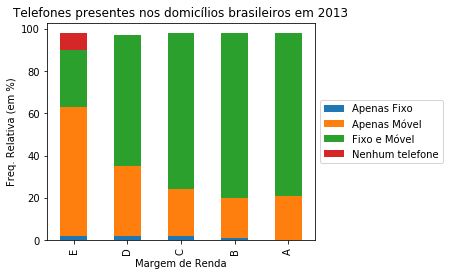

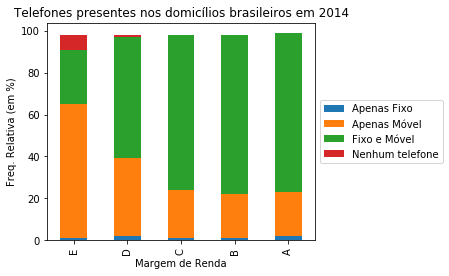

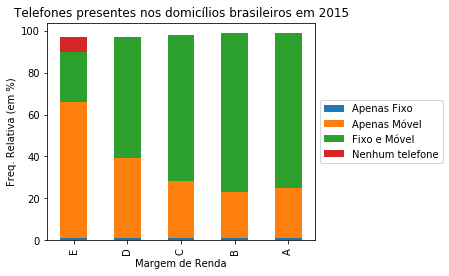

In [376]:
#2013
plot = analysis13.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2013')
plt.ylabel('Freq. Relativa (em %)')
plt.xlabel('Margem de Renda')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#2014
plot = analysis14.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2014')
plt.ylabel('Freq. Relativa (em %)')
plt.xlabel('Margem de Renda')

#etc etc
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#2015
plot = analysis15.plot(kind='bar', stacked=True,title='Telefones presentes nos domicílios brasileiros em 2015')
plt.ylabel('Freq. Relativa (em %)')
plt.xlabel('Margem de Renda')

#etc etc
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

___
## Quarta etapa: Conclusões

Para o ano de 2013, a adoção de telefones móveis já era bem dividida entre todas as faixas de renda, com mais de 90% dos domicílios tendo alguma forma de telefone móvel

Houve uma diminuição na quantidade de domícilios apenas com telefones fixos, mas essa diminuição se apresentou por todas as faixas, contradizendo a hipótese original proposta